<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-25 14:14:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.1MB/s    in 2.4s    

2025-01-25 14:14:25 (64.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Load the data


In [6]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [7]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



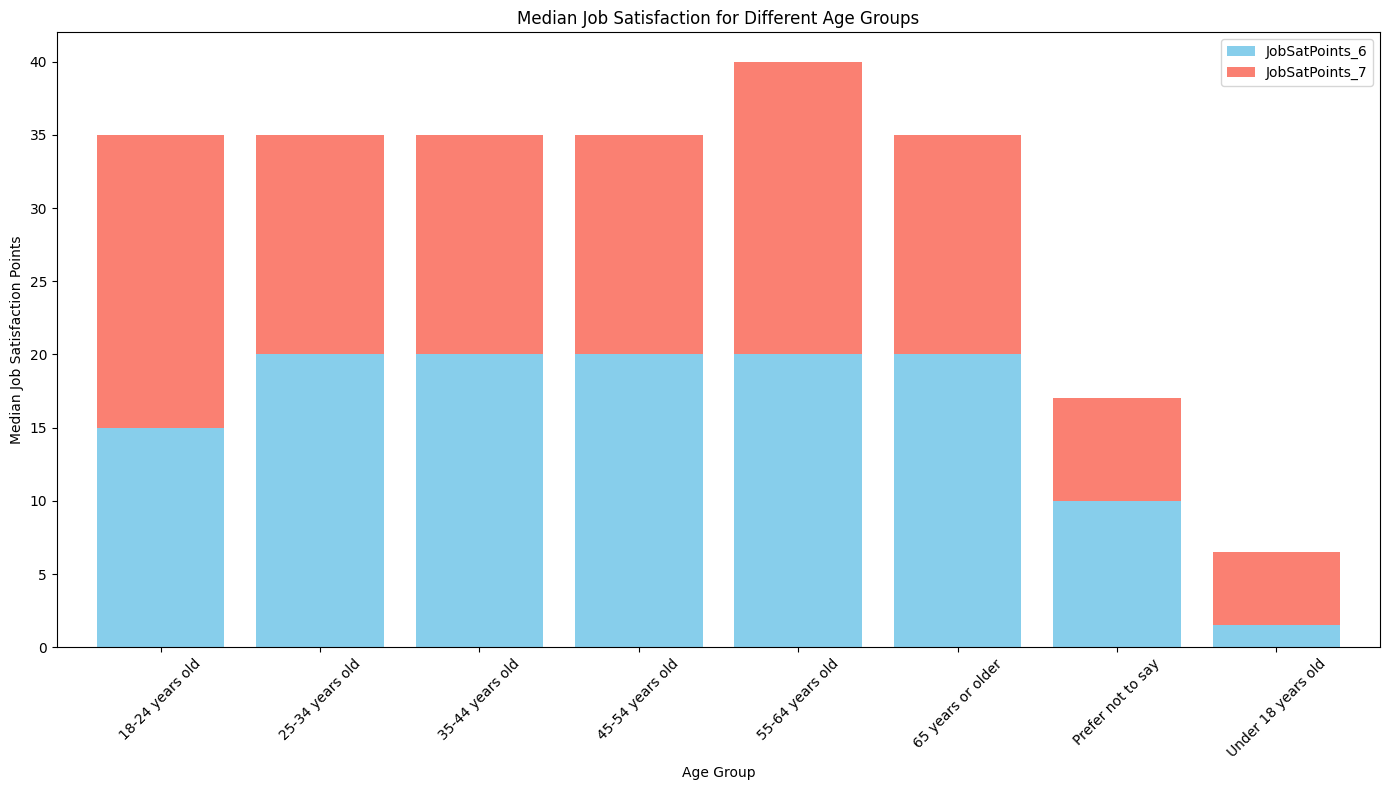

In [8]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_job_sat = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate the median of JobSatPoints_6 and JobSatPoints_7
age_grouped_sat = df_cleaned_job_sat.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plot a stacked bar chart
ax = age_grouped_sat.plot(x='Age', 
                          kind='bar', 
                          stacked=True, 
                          figsize=(14, 8), 
                          color=['skyblue', 'salmon'],
                          width=0.8)

# Adding titles and labels
plt.title('Median Job Satisfaction for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_6764/3543810987.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_emp_status['PrimaryEmploymentStatus'] = df_cleaned_emp_status['Employment'].str.split(';').str[0]


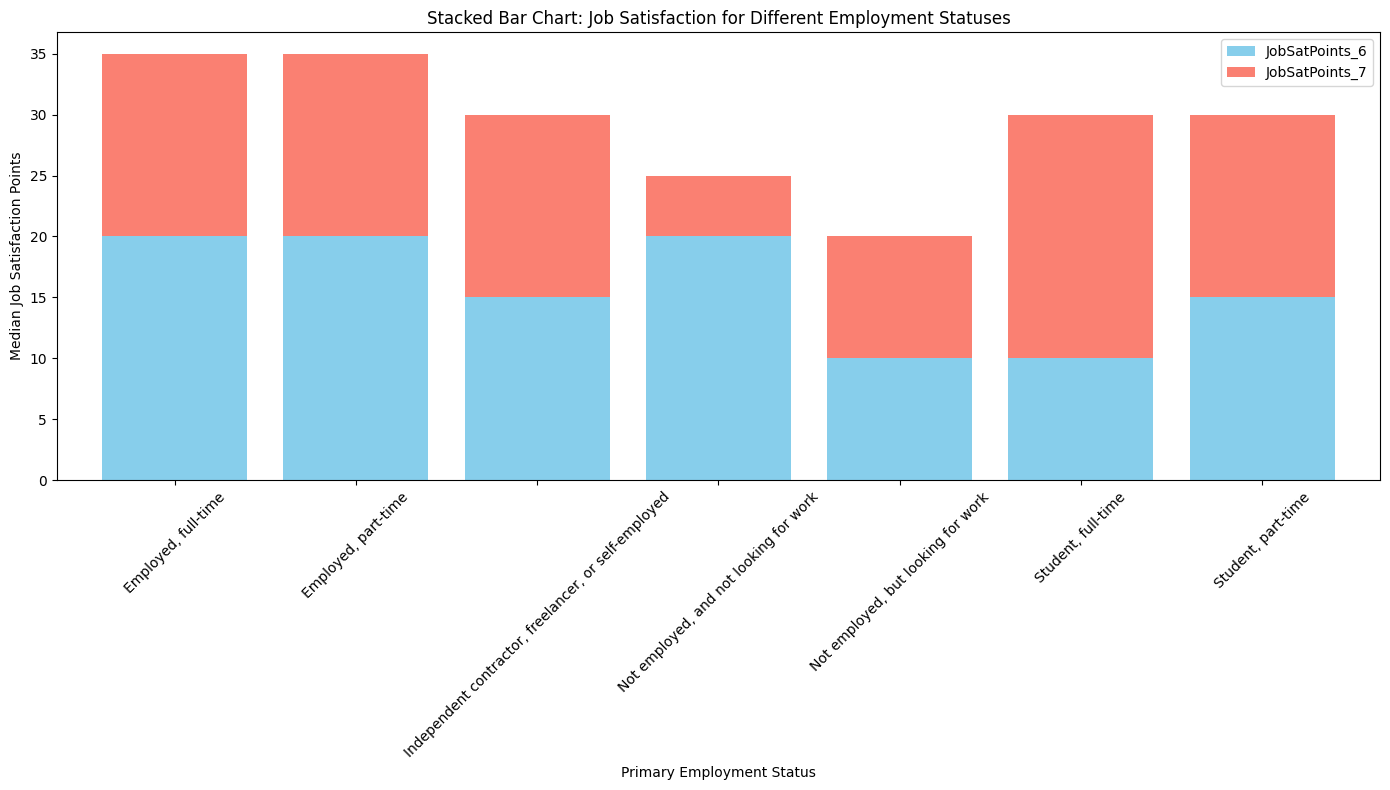

In [9]:
##Write your code here

# Clean the data by removing NaN values in the relevant columns
df_cleaned_emp_status = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Extract the first value before the semicolon in the 'EmploymentStatus' column
df_cleaned_emp_status['PrimaryEmploymentStatus'] = df_cleaned_emp_status['Employment'].str.split(';').str[0]

# Group by the primary employment status and calculate the median of JobSatPoints_6 and JobSatPoints_7
emp_status_grouped_sat = df_cleaned_emp_status.groupby('PrimaryEmploymentStatus')[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()

# Plot a stacked bar chart
ax = emp_status_grouped_sat.plot(x='PrimaryEmploymentStatus', 
                                 kind='bar', 
                                 stacked=True, 
                                 figsize=(14, 8), 
                                 color=['skyblue', 'salmon'],
                                 width=0.8)

# Adding titles and labels
plt.title('Stacked Bar Chart: Job Satisfaction for Different Employment Statuses')
plt.xlabel('Primary Employment Status')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [10]:
filtered_df = df[df['Age'] == '25-34 years old']

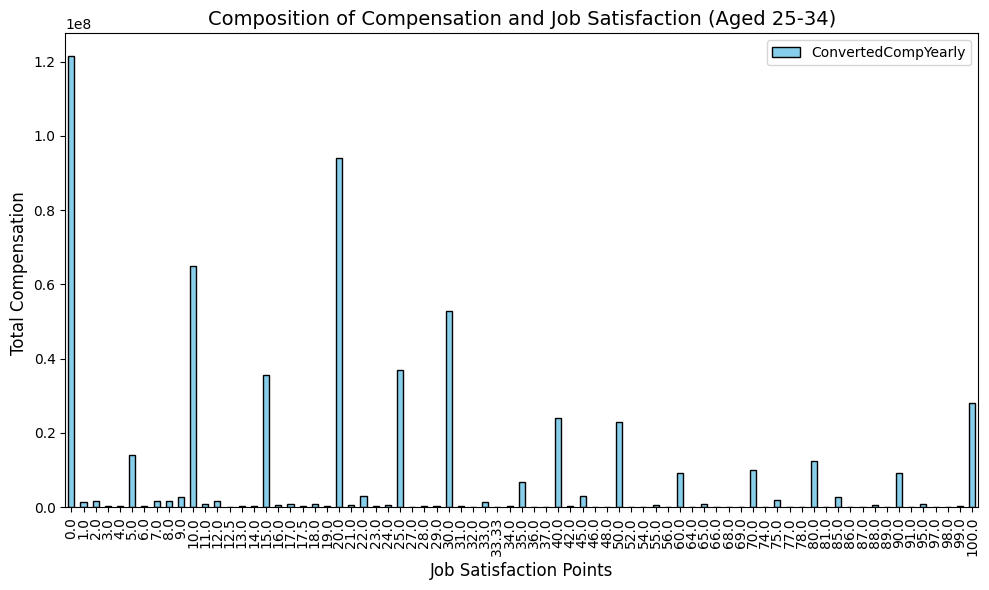

In [11]:
##Write your code here

# Filter the data for respondents aged 25-34
filtered_df = df[(df['Age'] == '25-34 years old')]

aggregated_data = filtered_df.groupby('JobSatPoints_6')[['ConvertedCompYearly']].sum()

# Create a stacked bar chart
ax = aggregated_data.plot(kind='bar', stacked=True, figsize=(10, 6), color='skyblue', edgecolor='black')

# Customize the plot
ax.set_title('Composition of Compensation and Job Satisfaction (Aged 25-34)', fontsize=14)
ax.set_xlabel('Job Satisfaction Points', fontsize=12)
ax.set_ylabel('Total Compensation ', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [12]:
# Filter the dataframe for the desired age groups
selected_ages = ['18-24 years old', '35-44 years old', '55-64 years old', '45-54 years old']
filtered_df = df[df['Age'].isin(selected_ages)]

# Print descriptive statistics for Job Satisfaction and Compensation
print("Job Satisfaction Statistics:")
print(filtered_df['JobSatPoints_6'].describe())

print("\nCompensation Statistics:")
print(filtered_df['ConvertedCompYearly'].describe())

Job Satisfaction Statistics:
count    16372.000000
mean        23.379541
std         25.958255
min          0.000000
25%          0.000000
50%         20.000000
75%         30.000000
max        100.000000
Name: JobSatPoints_6, dtype: float64

Compensation Statistics:
count    1.285600e+04
mean     9.172186e+04
std      1.385985e+05
min      1.000000e+00
25%      3.544400e+04
50%      7.200000e+04
75%      1.199572e+05
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64


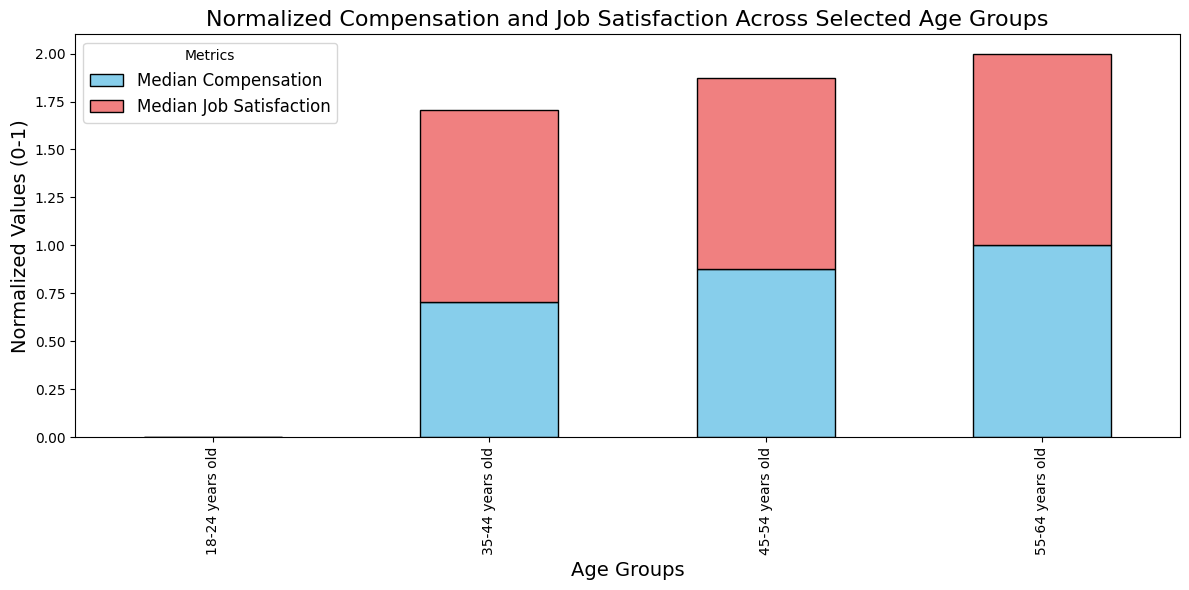

In [13]:
# Filter the dataframe for the desired age groups
selected_ages = ['18-24 years old', '35-44 years old', '55-64 years old', '45-54 years old']
filtered_df = df[df['Age'].isin(selected_ages)]

# Group by 'Age' and calculate the median for both compensation and job satisfaction
age_group_data = filtered_df.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).rename(columns={
    'ConvertedCompYearly': 'MedianCompensation',
    'JobSatPoints_6': 'MedianJobSatisfaction'
})

# Normalize the values to bring them to a comparable scale (0-1)
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
    scaler.fit_transform(age_group_data),
    columns=age_group_data.columns,
    index=age_group_data.index
)

# Plot the normalized stacked bar chart
ax = normalized_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['skyblue', 'lightcoral'],
    edgecolor='black'
)

# Customize the chart
ax.set_title('Normalized Compensation and Job Satisfaction Across Selected Age Groups', fontsize=16)
ax.set_xlabel('Age Groups', fontsize=14)
ax.set_ylabel('Normalized Values (0-1)', fontsize=14)
ax.legend(['Median Compensation', 'Median Job Satisfaction'], title='Metrics', fontsize=12)

plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [14]:
top_5_databases = df['DatabaseWantToWorkWith'].value_counts().head(5)
print(top_5_databases)

print(df['Age'].unique())

DatabaseWantToWorkWith
PostgreSQL              3738
PostgreSQL;SQLite       1533
SQLite                  1476
Microsoft SQL Server    1431
MySQL                   1139
Name: count, dtype: int64
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


/tmp/ipykernel_6764/103672258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age'] = pd.Categorical(filtered_df['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_6764/103672258.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_db_counts = filtered_df.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)


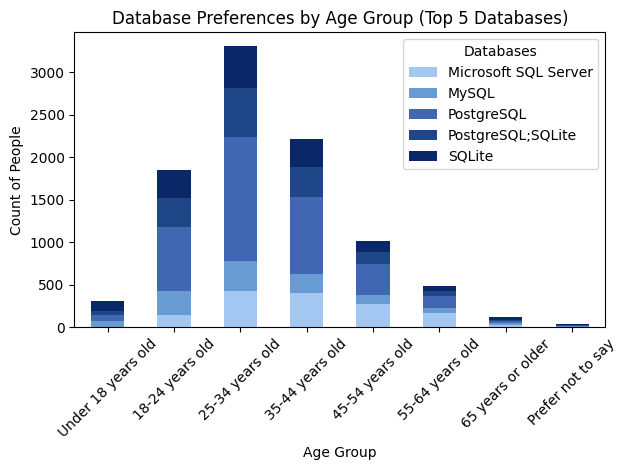

In [17]:
##Write your code here

# Define the desired order of the age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', 
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

# Get the top 5 databases
top_5_databases = df['DatabaseWantToWorkWith'].value_counts().head(5).index

# Filter the data to include only the top 5 databases
filtered_df = df[df['DatabaseWantToWorkWith'].isin(top_5_databases)]

# Convert the 'Age' column to a categorical type with the specified order
filtered_df['Age'] = pd.Categorical(filtered_df['Age'], categories=age_order, ordered=True)

# Pivot the data so that we can plot the databases by age group
age_db_counts = filtered_df.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = age_db_counts.plot(kind='bar', stacked=True, color=['#a3c7f0', '#699bd3', '#4267b2', '#1f4788', '#0a2867'])

# Adding labels and title
plt.title('Database Preferences by Age Group (Top 5 Databases)')
plt.xlabel('Age Group')
plt.ylabel('Count of People')
plt.xticks(rotation=45)

# Add the legend with the title "Databases"
plt.legend(title="Databases")

plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [25]:
# Print unique values for 'Employment' and 'JobSat' columns
print("Unique values for Employment:")
print(df['Employment'].unique())

print("\nUnique values for JobSat:")
print(df['JobSat'].unique())

Unique values for Employment:
['Employed, full-time' 'Student, full-time'
 'Student, full-time;Not employed, but looking for work'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Employed, full-time;Student, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Employed, full-time;Student, full-time' 'Employed, part-time'
 'Student, full-time;Employed, part-time'
 'Student, part-time;Employed, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Student, part-time'
 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time'
 'Student, full-time;Not employed, but look

In [24]:
# Extract the first part of the 'Employment' before the semicolon
df['PrimaryEmployment'] = df['Employment'].str.split(';').str[0]

# Print the unique values for the PrimaryEmployment
print("Unique values for Employment Type:")
print(df['PrimaryEmployment'].unique())

# Drop rows with NaN values in the 'JobSat' column
df_cleaned = df.dropna(subset=['JobSat'])

# Print the unique values for JobSat after dropping NaN values
print("Unique values for JobSat after dropping NaN:")
print(df_cleaned['JobSat'].unique())

Unique values for Employment Type:
['Employed, full-time' 'Student, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work' 'Employed, part-time'
 'Student, part-time' 'I prefer not to say'
 'Not employed, but looking for work' 'Retired']
Unique values for JobSat after dropping NaN:
[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


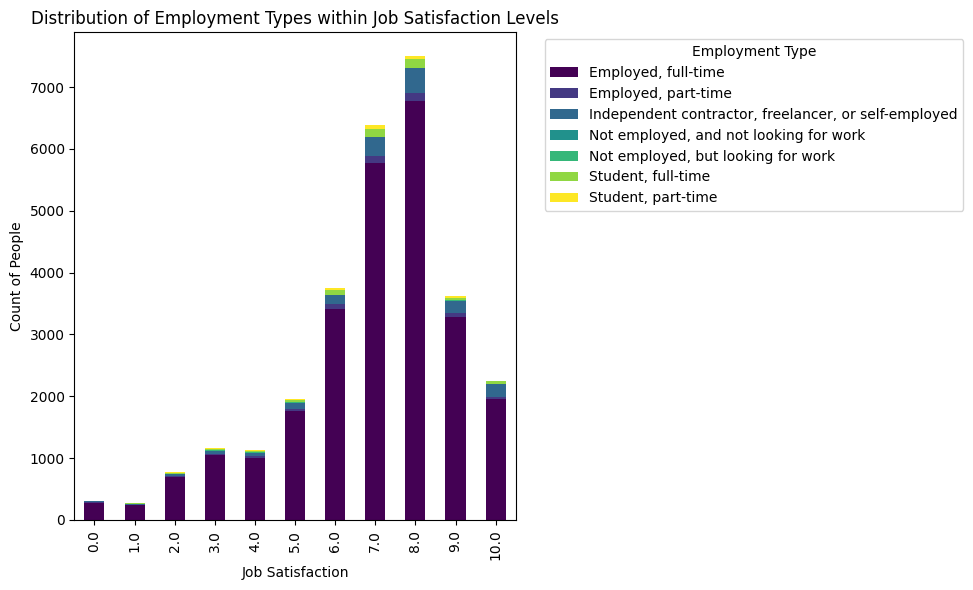

In [29]:
##Write your code here

# Group the data by 'JobSat' and 'PrimaryEmployment' and count the occurrences
employment_by_satisfaction = df_cleaned.groupby(['JobSat', 'PrimaryEmployment']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = employment_by_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding labels and title
plt.title('Distribution of Employment Types within Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count of People')

# Add the legend with the title "Employment Type"
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [30]:
# Print unique values for 'LanguageAdmired' and 'Age' columns
print("Unique values for LanguageAdmired:")
print(df['LanguageAdmired'].unique())

print("\nUnique values for Age:")
print(df['Age'].unique())

Unique values for LanguageAdmired:
[nan
 'Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript'
 'C#' ... 'Elixir;Lua;Python;Ruby;SQL'
 'Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;PowerShell;Rust;Solidity;SQL;TypeScript;VBA;Visual Basic (.Net)'
 'Bash/Shell (all shells);C#;HTML/CSS;Java;JavaScript;Objective-C;Python;SQL;Swift;TypeScript']

Unique values for Age:
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [31]:
# Drop rows with NaN values in the 'LanguageAdmired' column
df_cleaned_language = df.dropna(subset=['LanguageAdmired'])

# Extract the first programming language before the semicolon
df_cleaned_language['PrimaryLanguageAdmired'] = df_cleaned_language['LanguageAdmired'].str.split(';').str[0]

# Print the unique values for PrimaryLanguageAdmired
print("Unique values for Primary Language Admired:")
print(df_cleaned_language['PrimaryLanguageAdmired'].unique())

Unique values for Primary Language Admired:
['Bash/Shell (all shells)' 'C#' 'HTML/CSS' 'C++' 'R' 'Lua' 'JavaScript'
 'Python' 'C' 'Rust' 'PowerShell' 'PHP' 'Clojure' 'Go' 'Assembly' 'Dart'
 'Crystal' 'Delphi' 'Java' 'Groovy' 'SQL' 'GDScript' 'Scala' 'Kotlin'
 'TypeScript' 'Haskell' 'Swift' 'Elixir' 'Apex' 'Lisp' 'Objective-C' 'F#'
 'Cobol' 'Julia' 'Ruby' 'VBA' 'Ada' 'Visual Basic (.Net)' 'OCaml' 'MATLAB'
 'Fortran' 'Perl' 'Erlang' 'MicroPython' 'Nim' 'Zig' 'Solidity' 'Prolog'
 'Zephyr']


/tmp/ipykernel_6764/2962557825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_language['PrimaryLanguageAdmired'] = df_cleaned_language['LanguageAdmired'].str.split(';').str[0]


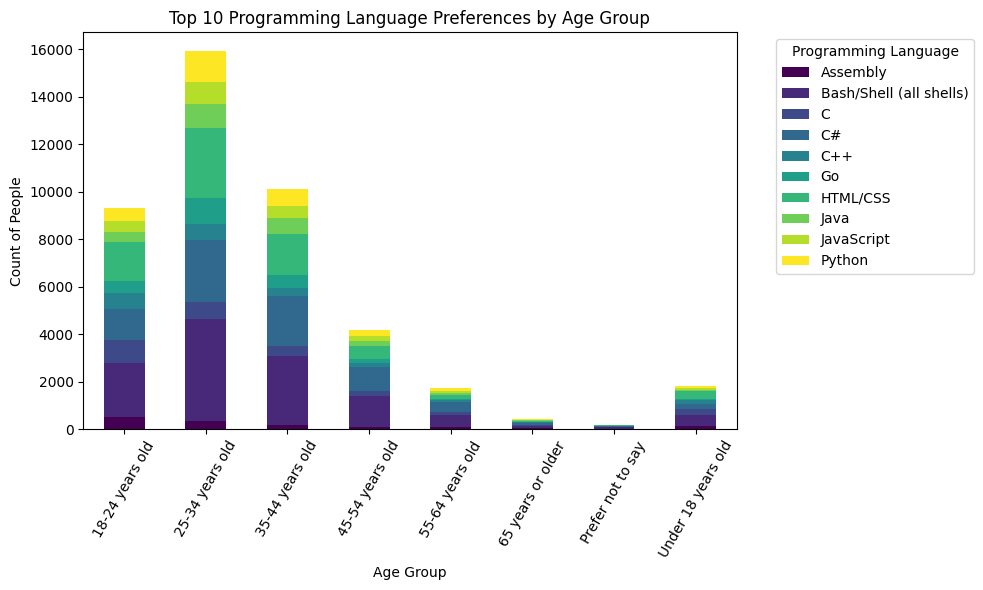

In [37]:
##Write your code here

# Count the occurrences of each programming language admired
top_10_languages = df_cleaned_language['PrimaryLanguageAdmired'].value_counts().head(10).index

# Filter the dataset to include only the top 10 languages
df_top_10 = df_cleaned_language[df_cleaned_language['PrimaryLanguageAdmired'].isin(top_10_languages)]

# Group the data by 'Age' and 'PrimaryLanguageAdmired' and count the occurrences
language_by_age = df_top_10.groupby(['Age', 'PrimaryLanguageAdmired']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = language_by_age.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding labels and title
plt.title('Top 10 Programming Language Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of People')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=60)

# Add the legend with the title "Programming Language"
plt.legend(title="Programming Language", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [46]:
# Drop rows with NaN values in both 'PlatformAdmired' and 'Employment' columns
df_cleaned = df.dropna(subset=['PlatformAdmired', 'Employment'])

# Extract the first platform before the semicolon for 'PlatformAdmired'
df_cleaned['PrimaryPlatformAdmired'] = df_cleaned['PlatformAdmired'].str.split(';').str[0]

# Extract the first employment type before the semicolon for 'Employment'
df_cleaned['PrimaryEmploymentType'] = df_cleaned['Employment'].str.split(';').str[0]

# Print the unique values for PrimaryPlatformAdmired and PrimaryEmploymentType
print("Unique values for Primary Platform Admired:")
print(df_cleaned['PrimaryPlatformAdmired'].unique())

print("\nUnique values for Primary Employment Type:")
print(df_cleaned['PrimaryEmploymentType'].unique())

Unique values for Primary Platform Admired:
['Amazon Web Services (AWS)' 'Google Cloud' 'Cloudflare' 'Vercel'
 'Hetzner' 'Microsoft Azure' 'Fly.io' 'Render'
 'Oracle Cloud Infrastructure (OCI)' 'PythonAnywhere' 'Digital Ocean'
 'Netlify' 'VMware' 'Supabase' 'OpenShift' 'Vultr' 'Firebase' 'OVH'
 'IBM Cloud Or Watson' 'Linode, now Akamai' 'Databricks' 'Heroku'
 'Managed Hosting' 'Alibaba Cloud' 'Colocation' 'OpenStack' 'Scaleway']

Unique values for Primary Employment Type:
['Employed, full-time' 'Student, full-time'
 'Independent contractor, freelancer, or self-employed'
 'Student, part-time' 'I prefer not to say'
 'Not employed, but looking for work'
 'Not employed, and not looking for work' 'Retired' 'Employed, part-time']


/tmp/ipykernel_6764/3780323279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PrimaryPlatformAdmired'] = df_cleaned['PlatformAdmired'].str.split(';').str[0]
/tmp/ipykernel_6764/3780323279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PrimaryEmploymentType'] = df_cleaned['Employment'].str.split(';').str[0]


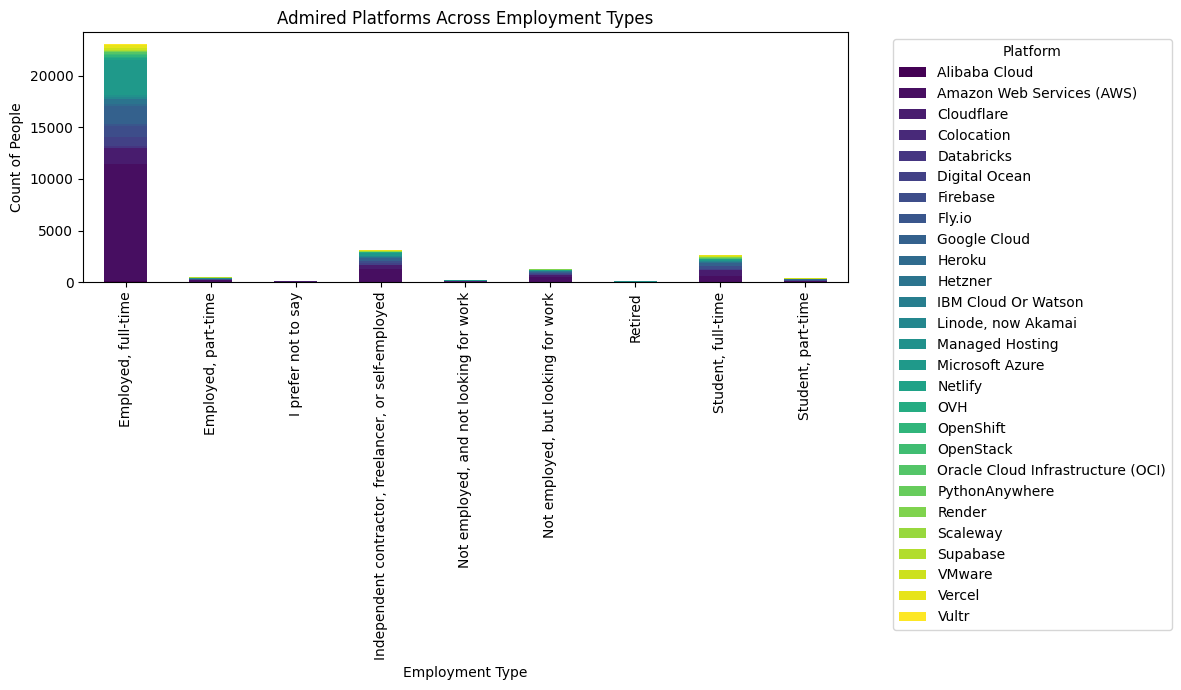

In [49]:
##Write your code here

# Group the data by 'PrimaryEmploymentType' and 'PrimaryPlatformAdmired' and count the occurrences
platform_by_employment = df_cleaned.groupby(['PrimaryEmploymentType', 'PrimaryPlatformAdmired']).size().unstack(fill_value=0)

# Create a stacked bar chart
ax = platform_by_employment.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# Adding labels and title
plt.title('Admired Platforms Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count of People')

# Add the legend with the title "Platform"
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
